In [1]:
# we'll start by importing the stuff we need, including all the packages needed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#We'll load up our dataset using read_csv() and take a look at it.
#but we are using only the top 1300 rows to train and test our model. 
#because we want to use the remaining data for real life testing.
data = pd.read_csv('heart.csv')[:1300]
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1296,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
1297,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
1298,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0


In [5]:
#We have loaded the unloaded data with sep to change the seperation type.
#we are using this data for real life testing of our model.
cp = pd.read_csv('heart.csv', sep=";")
cp.tail(27)

,"age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target"
1301,"58,1,0,146,218,0,1,105,0,2,1,1,3,0"
1302,"57,1,1,124,261,0,1,141,0,0.3,2,0,3,0"
1303,"58,0,1,136,319,1,0,152,0,0,2,2,2,0"
1304,"61,1,0,138,166,0,0,125,1,3.6,1,1,2,0"
1305,"42,1,0,136,315,0,1,125,1,1.8,1,0,1,0"
1306,"52,1,0,128,204,1,1,156,1,1,1,0,0,0"
1307,"59,1,2,126,218,1,1,134,0,2.2,1,1,1,0"
1308,"40,1,0,152,223,0,1,181,0,0,2,0,3,0"
1309,"61,1,0,140,207,0,0,138,1,1.9,2,1,3,0"
1310,"46,1,0,140,311,0,1,120,1,1.8,1,2,3,0"


In [6]:
#taking a look at our data again.
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1296,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
1297,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
1298,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0


In [6]:
#We use .info() to get more information about the data we are using like the columns datatype and amount of rows in every column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1300 non-null   int64  
 1   sex       1300 non-null   int64  
 2   cp        1300 non-null   int64  
 3   trestbps  1300 non-null   int64  
 4   chol      1300 non-null   int64  
 5   fbs       1300 non-null   int64  
 6   restecg   1300 non-null   int64  
 7   thalach   1300 non-null   int64  
 8   exang     1300 non-null   int64  
 9   oldpeak   1300 non-null   float64
 10  slope     1300 non-null   int64  
 11  ca        1300 non-null   int64  
 12  thal      1300 non-null   int64  
 13  target    1300 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 142.3 KB


In [7]:
#We use .isnull().sum() to get the number of null values in every column.
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#We use .unique() to get the unique values in our target column. 
# 0 means that he does not have heart disease.
# while 1 means that he is a heart disease victim.
data['target'].unique()

array([0, 1], dtype=int64)

In [9]:
#We use .value_counts to get amounts of each unique value in our target column.
data['target'].value_counts()

1    691
0    609
Name: target, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

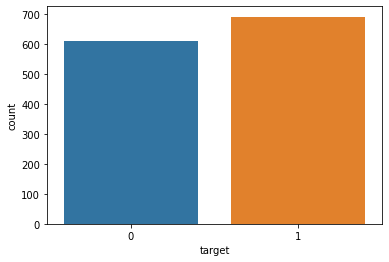

In [10]:
#We use seaborn to get a simple countplot of our target column unique values.
sns.countplot(data['target'])

In [11]:
#Now x stands for our data and y stands for our data labels.
x = data.drop('target', axis = 1)
y = data['target']

In [12]:
#we divided our data into training set and testing set.
#we use test_size=0.2 to make our testing set to e 20% of our data and our training set is now 80% of our data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:
#we use the standard scaler to scale our data.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
x_train[:10]

array([[ 1.80663422, -1.49662132, -0.94370771, -1.08148339, -1.95546571,
        -0.42324735,  0.91501292, -1.07220476, -0.69693205,  0.48812279,
        -0.61851069, -0.73023662, -0.48601606],
       [-1.46937343,  0.66817169, -0.94370771, -1.19248687, -1.48368934,
        -0.42324735, -1.00743846,  0.36628738, -0.69693205, -0.88158432,
         0.9896171 , -0.73023662,  1.12886157],
       [ 1.15143269, -1.49662132,  1.00362566,  1.30509136,  0.50597621,
        -0.42324735,  0.91501292, -0.06961933, -0.69693205, -0.19673077,
         0.9896171 , -0.73023662, -0.48601606],
       [ 1.3698332 ,  0.66817169, -0.94370771, -0.35996079,  0.19829597,
         2.36268459,  0.91501292,  0.58424073, -0.69693205, -0.71037093,
        -0.61851069,  1.17075483,  1.12886157],
       [ 0.27783065,  0.66817169,  0.02995897, -0.41546253,  0.34188008,
        -0.42324735,  0.91501292, -0.37475403, -0.69693205, -0.62476424,
         0.9896171 , -0.73023662,  1.12886157],
       [-1.46937343,  0.668171

In [15]:
#we use .fit to train the RandomForestClassifier with our training data.
#we also use the .predict to predict our testing data targets. 
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [16]:
#we have use the classification_report to compare our predicted testing data targets with The original testing data targets as you can see our model is 100% accurate.
#and we also use the confusion_matrix as you can see our model was not confused at all.
#our model predicted all the labels correctly.
#With RandomForestClassifier, we achieved 100% accuracy.
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       128

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

[[132   0]
 [  0 128]]


In [17]:
#we also used the SupportVectorClassifier.
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [19]:
#With SupportVectorClassifier, we achieved 93% accuracy.
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       132
           1       0.88      0.98      0.93       128

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

[[115  17]
 [  2 126]]


In [20]:
#we also used the multi-layer perceptron Classifier.
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train, y_train)
pred_mlpc = mlpc.predict(x_test)

In [21]:
#With multi-layer perceptron Classifier, we achieved 100% accuracy.
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       128

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

[[132   0]
 [  0 128]]


In [23]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

1.0

In [24]:
from sklearn.metrics import accuracy_score
fm = accuracy_score(y_test, pred_clf)
fm

0.926923076923077

In [25]:
from sklearn.metrics import accuracy_score
pm = accuracy_score(y_test, pred_mlpc)
pm

1.0

In [26]:
#Real life testing of our RandomForestClassifier model.
xnew=[[37,1,2,130,250,0,1,187,0,3.5,0,0,2]]
xnew = sc.transform(xnew)
ynew = rfc.predict(xnew)
ynew
if(ynew==0):
    print('he dont have heart disease')
else:
    print('he is a heart disease patient')

he is a heart disease patient
